In [151]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.preprocessing import OneHotEncoder

In [5]:
workouts2018 = pd.read_csv("workouts-2018.csv")
workouts2019 = pd.read_csv("workouts-2019.csv")
workouts2020 = pd.read_csv("workouts-2020.csv")
workouts2021 = pd.read_csv("workouts-2021.csv")
workouts2022 = pd.read_csv("workouts-2022.csv")
workouts2023 = pd.read_csv("workouts-2023.csv")

In [6]:
workouts2018.head()

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,...,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,PWRZone8Minutes,PWRZone9Minutes,PWRZone10Minutes,Rpe,Feeling
0,Rest Day,Day Off,There was some real intensity in your sessions...,NaN,NaN,2018-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Rest Day,Day Off,Don’t be tempted to squeeze and additional ses...,NaN,NaN,2018-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10-Mile Time Trial or Under/Over Intervals,Bike,Time: 50 mins - 1 hr 10 mins Warm-up: http://b...,1.166667,NaN,2018-01-03,Develops aerobic endurance and builds power at...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Rest Day,Day Off,If you have been short of time during this tra...,NaN,NaN,2018-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Rest Day,Day Off,This is an important session. Don’t skip recov...,NaN,NaN,2018-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = pd.concat([workouts2018, workouts2019, 
                  workouts2020, workouts2021, 
                  workouts2022, workouts2023])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4154 entries, 0 to 1104
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Title                    4104 non-null   object 
 1   WorkoutType              4154 non-null   object 
 2   WorkoutDescription       760 non-null    object 
 3   PlannedDuration          1631 non-null   float64
 4   PlannedDistanceInMeters  96 non-null     float64
 5   WorkoutDay               4154 non-null   object 
 6   CoachComments            288 non-null    object 
 7   DistanceInMeters         3847 non-null   float64
 8   PowerAverage             1849 non-null   float64
 9   PowerMax                 1849 non-null   float64
 10  Energy                   1824 non-null   float64
 11  AthleteComments          1496 non-null   object 
 12  TimeTotalInHours         3943 non-null   float64
 13  VelocityAverage          3847 non-null   float64
 14  VelocityMax              0 no

In [13]:
#drop columns that only have null values
data = data.drop(columns=['VelocityMax', 'CadenceMax', 'TorqueAverage',
                       'TorqueMax', 'HRZone8Minutes', 'HRZone9Minutes',
                       'HRZone10Minutes', 'PWRZone8Minutes',
                       'PWRZone9Minutes', 'PWRZone10Minutes'])

In [17]:
data.dtypes

Title                       object
WorkoutType                 object
WorkoutDescription          object
PlannedDuration            float64
PlannedDistanceInMeters    float64
WorkoutDay                  object
CoachComments               object
DistanceInMeters           float64
PowerAverage               float64
PowerMax                   float64
Energy                     float64
AthleteComments             object
TimeTotalInHours           float64
VelocityAverage            float64
CadenceAverage             float64
HeartRateAverage           float64
HeartRateMax               float64
IF                         float64
TSS                        float64
HRZone1Minutes             float64
HRZone2Minutes             float64
HRZone3Minutes             float64
HRZone4Minutes             float64
HRZone5Minutes             float64
HRZone6Minutes             float64
HRZone7Minutes             float64
PWRZone1Minutes            float64
PWRZone2Minutes            float64
PWRZone3Minutes     

In [18]:
data['WorkoutDay'] = pd.to_datetime(data['WorkoutDay'])

In [19]:
data['WorkoutDay'].head()

0   2018-01-01
1   2018-01-02
2   2018-01-03
3   2018-01-04
4   2018-01-05
Name: WorkoutDay, dtype: datetime64[ns]

In [59]:
data['WorkoutType'].unique()

array(['Day Off', 'Bike', 'Walk', 'Run', 'Strength', 'Swim', 'Other',
       'MTB', 'Custom', 'X-Train'], dtype=object)

In [20]:
#import to SQLLite to practice SQL queries
import sqlite3
conn = sqlite3.connect('cyclingdata.db')

data.to_sql('data', conn, if_exists='replace', index=False)

4154

In [183]:
query = """
    SELECT Title, WorkoutType, WorkoutDescription, PlannedDuration, WorkoutDay, TimeTotalinHours, RPE, IF, TSS 
    FROM data
    WHERE TimeTotalinHours > 0
        AND WorkoutDescription != 'None'
        AND TSS != "NaN"
        AND Rpe != "NaN"
        AND WorkoutType = 'Bike'OR WorkoutType = 'MTB'
    """

result = pd.read_sql_query(query, conn)
result.head(10)

,Title,WorkoutType,WorkoutDescription,PlannedDuration,WorkoutDay,TimeTotalInHours,Rpe,IF,TSS
0,First intervals of the year! =D,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.250000,2019-02-05T00:00:00,1.254444,8.0,0.867945,94.09
1,Zwift - Feb 5 & 7 Intervals,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.250000,2019-02-07T00:00:00,1.263611,7.0,0.866481,94.12
2,Zwift - VoxTour Stage 3: Hannah Walker (E),Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.000000,2019-02-09T00:00:00,2.005278,5.0,0.712023,101.20
3,Cycling,Bike,Duration: 90-120 minutes Course: Flat or rolli...,1.500000,2019-02-10T00:00:00,1.325833,4.0,0.833616,102.79
4,1.5 Hour Ride,Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.000000,2019-02-16T00:00:00,2.108056,5.0,0.656301,102.48
5,2 Hour Ride,Bike,Duration: 90-120 minutes Course: Flat or rolli...,1.500000,2019-02-18T00:00:00,1.325556,6.0,0.793293,93.06
6,Tuesday Intervals,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.262467,2019-02-19T00:00:00,1.255833,8.0,0.900267,101.36
7,"""Funtervals""",Bike,Duration: 70 minutes Course: Flat or rolling h...,1.134722,2019-02-21T00:00:00,1.136667,10.0,1.011034,115.17
8,Saturday Morning Pain Session,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.200000,2019-02-23T00:00:00,1.203333,8.0,0.905888,98.21
9,2 Hour Ride,Bike,Duration: 2 to 2.5 hours Course: Rolling hills...,1.500000,2019-02-24T00:00:00,1.401944,6.0,0.780160,84.97


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


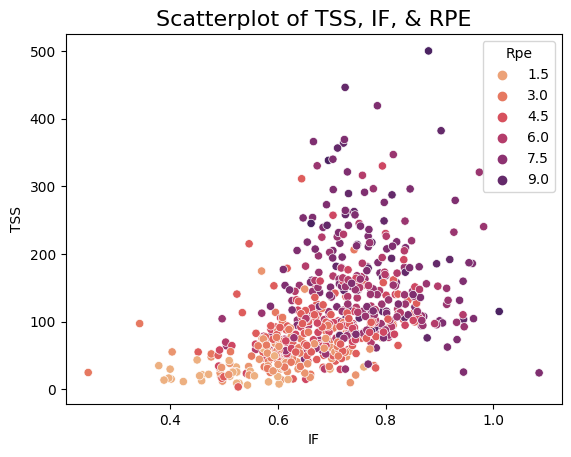

In [77]:
sns.scatterplot(data=result, x='IF', y='TSS', hue='Rpe', palette='flare')
plt.title('Scatterplot of TSS, IF, & RPE', fontsize=16)
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


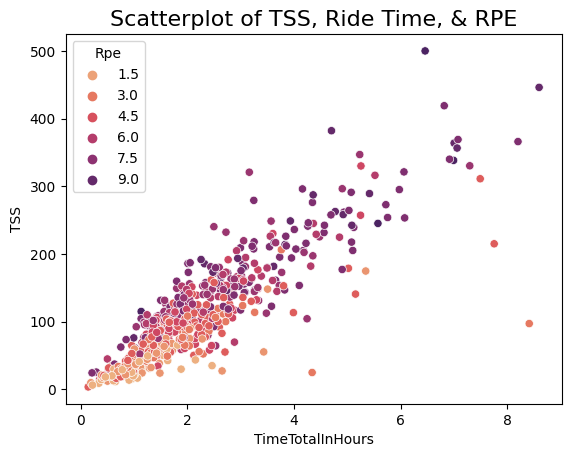

In [78]:
sns.scatterplot(data=result, x='TimeTotalInHours', y='TSS', hue='Rpe', palette='flare')
plt.title('Scatterplot of TSS, Ride Time, & RPE', fontsize=16)
plt.show()

In [79]:
numeric_df = result.drop(columns=result.select_dtypes(exclude=['number']).columns)

numeric_df.corr()

,PlannedDuration,TimeTotalInHours,Rpe,IF,TSS
PlannedDuration,1.000000,0.764733,0.433076,0.117775,0.707608
TimeTotalInHours,0.764733,1.000000,0.438718,0.306785,0.903844
Rpe,0.433076,0.438718,1.000000,0.582565,0.625136
IF,0.117775,0.306785,0.582565,1.000000,0.571928
TSS,0.707608,0.903844,0.625136,0.571928,1.000000


In [224]:
query = """
    SELECT *
    FROM data
    WHERE TimeTotalinHours > 0
        AND WorkoutDescription != 'None'
        AND TSS <> 'NaN'
        AND RPE <> 'NaN'
        AND Feeling <> 'NaN'
        AND WorkoutType = 'Bike'OR WorkoutType = 'MTB'
    """

result2 = pd.read_sql_query(query, conn)
result2.head()

,Title,WorkoutType,WorkoutDescription,PlannedDuration,PlannedDistanceInMeters,WorkoutDay,CoachComments,DistanceInMeters,PowerAverage,PowerMax,...,HRZone7Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,Rpe,Feeling
0,First intervals of the year! =D,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.25,NaN,2019-02-05T00:00:00,None,32188.740234,169.0,274.0,...,0.0,17.0,22.0,13.0,0.0,24.0,0.0,NaN,8.0,5.0
1,Zwift - Feb 5 & 7 Intervals,Bike,Duration: 75 minutes Course: Flat or rolling h...,1.25,NaN,2019-02-07T00:00:00,None,26779.939453,168.0,238.0,...,0.0,18.0,21.0,13.0,0.0,24.0,0.0,NaN,7.0,3.0
2,Zwift - VoxTour Stage 3: Hannah Walker (E),Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.00,NaN,2019-02-09T00:00:00,None,59809.238281,149.0,390.0,...,0.0,15.0,76.0,29.0,3.0,1.0,0.0,NaN,5.0,3.0
3,Cycling,Bike,Duration: 90-120 minutes Course: Flat or rolli...,1.50,NaN,2019-02-10T00:00:00,None,16836.869141,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,3.0
4,1.5 Hour Ride,Bike,Duration: 90-120 minutes Course: Flat or rolli...,2.00,NaN,2019-02-16T00:00:00,None,44226.210938,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0


/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


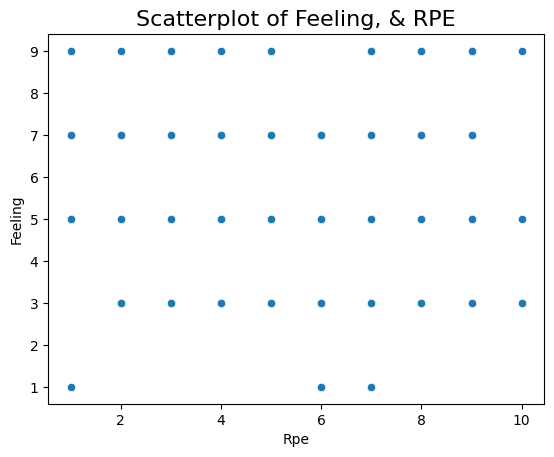

In [225]:
sns.scatterplot(data=result2, x='Rpe', y='Feeling')
plt.title('Scatterplot of Feeling, & RPE', fontsize=16)
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


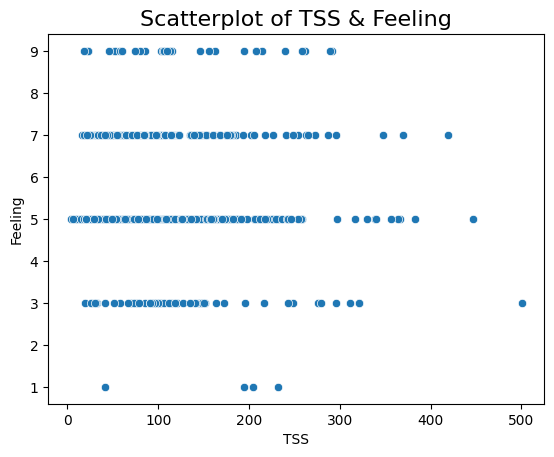

In [226]:
sns.scatterplot(data=result2, x='TSS', y='Feeling')
plt.title('Scatterplot of TSS & Feeling', fontsize=16)
plt.show()

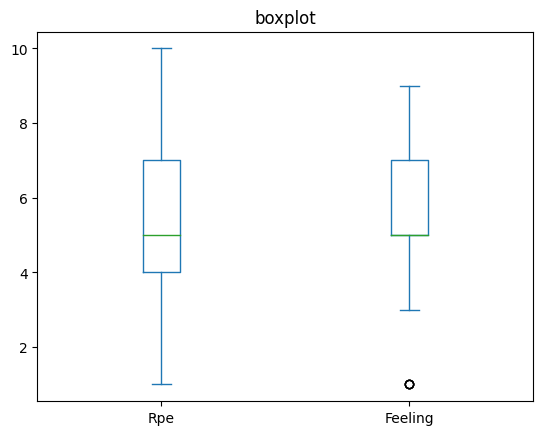

In [227]:
ax = result2[['Rpe', 'Feeling']].plot(kind='box', title='boxplot')
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='TSS'>

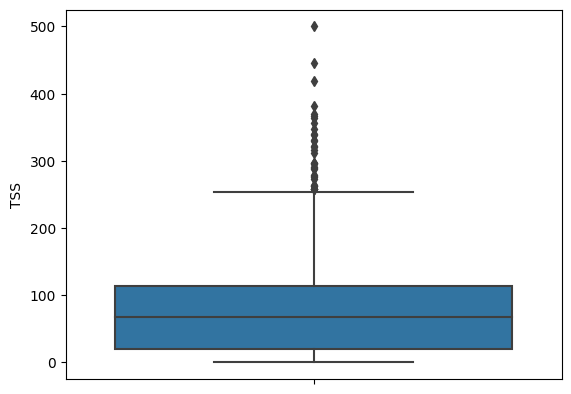

In [228]:
sns.boxplot(data=result2, y='TSS')

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


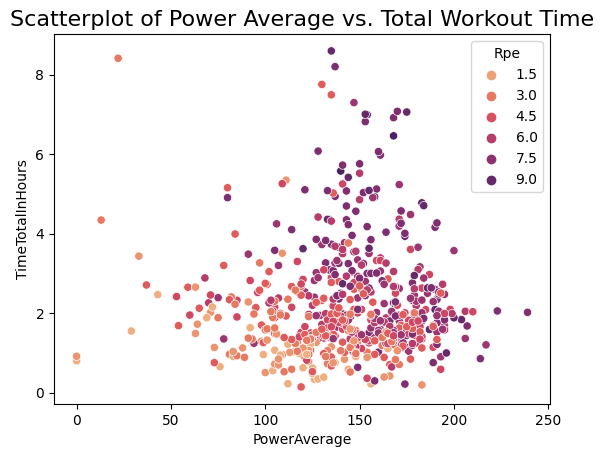

In [229]:
sns.scatterplot(data=result2, x='PowerAverage', y='TimeTotalInHours', hue='Rpe', palette='flare')
plt.title('Scatterplot of Power Average vs. Total Workout Time', fontsize=16)
plt.show()

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='PowerAverage'>

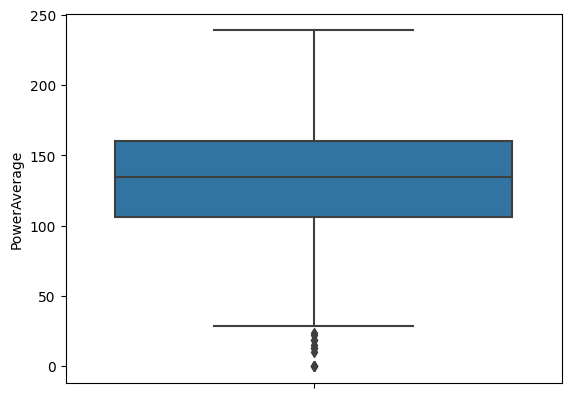

In [230]:
sns.boxplot(data=result2, y='PowerAverage')

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: ylabel='TimeTotalInHours'>

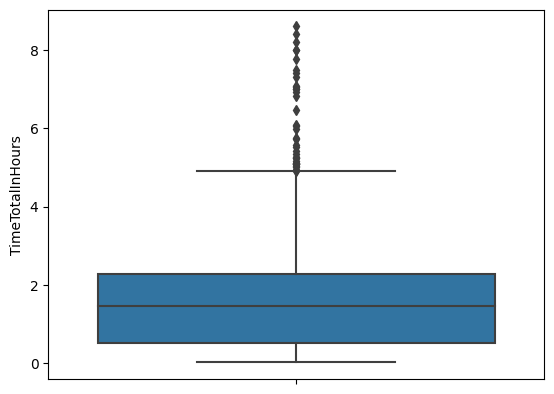

In [231]:
sns.boxplot(data=result2, y='TimeTotalInHours')

## Does RPE increase linearly w/ average HR or Power output?

/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/abigailsnyder/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


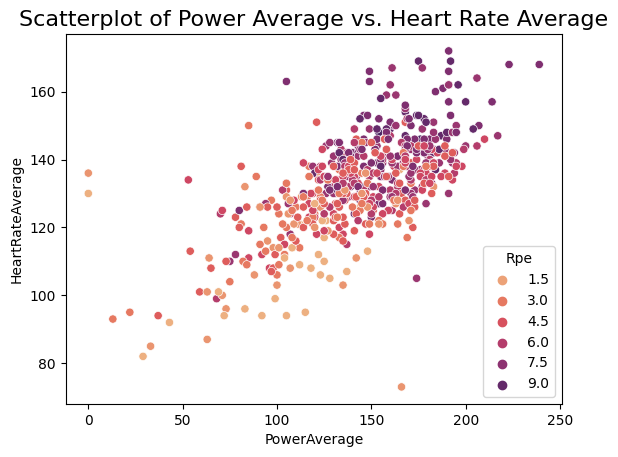

In [232]:
sns.scatterplot(data=result2, x='PowerAverage', y='HeartRateAverage', hue='Rpe', palette='flare')
plt.title('Scatterplot of Power Average vs. Heart Rate Average', fontsize=16)
plt.show()

Based on the above scatterplot, it does appear that as both average power and average heart rate increase, RPE increases. 

## Can we predict RPE based on duration, avg PWR, HR?

In [233]:
result2.Rpe.describe()

count    628.000000
mean       5.253185
std        2.294416
min        1.000000
25%        4.000000
50%        5.000000
75%        7.000000
max       10.000000
Name: Rpe, dtype: float64

In [234]:
result2.describe()

,PlannedDuration,PlannedDistanceInMeters,DistanceInMeters,PowerAverage,PowerMax,Energy,TimeTotalInHours,VelocityAverage,CadenceAverage,HeartRateAverage,...,HRZone7Minutes,PWRZone1Minutes,PWRZone2Minutes,PWRZone3Minutes,PWRZone4Minutes,PWRZone5Minutes,PWRZone6Minutes,PWRZone7Minutes,Rpe,Feeling
count,599.000000,45.0,1011.000000,892.000000,892.000000,888.000000,1015.000000,1011.000000,900.000000,888.000000,...,673.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,320.000000,628.000000,620.000000
mean,1.982015,0.0,25213.197613,131.110987,587.308296,842.295259,1.670513,4.349679,74.573333,128.311937,...,1.536404,54.194820,18.845721,12.054054,7.703829,4.476351,4.309685,1.912500,5.253185,5.393548
std,1.091855,0.0,24115.943166,39.124567,236.035584,777.430173,1.417433,1.625245,12.345966,16.231367,...,7.247265,48.151716,21.915330,14.032391,8.885156,5.416321,5.298299,2.606689,2.294416,1.378331
min,0.333333,0.0,0.000000,0.000000,0.000000,1.807000,0.027593,0.000000,0.000000,73.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.416667,0.0,7224.285156,106.000000,441.500000,229.622250,0.531354,3.325500,70.000000,119.000000,...,0.000000,18.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,4.000000,5.000000
50%,1.500000,0.0,20301.810547,135.000000,593.500000,689.969000,1.470923,4.199000,75.000000,130.000000,...,0.000000,44.000000,13.000000,8.000000,5.000000,3.000000,3.000000,1.000000,5.000000,5.000000
75%,2.500000,0.0,33675.865234,160.000000,699.250000,1156.944250,2.280475,5.254000,80.000000,139.000000,...,0.000000,76.000000,24.000000,16.000000,11.000000,7.000000,6.000000,2.250000,7.000000,7.000000
max,6.000000,0.0,163372.796875,239.000000,3209.000000,4427.438000,8.594491,10.745000,251.000000,172.000000,...,118.000000,484.000000,152.000000,107.000000,62.000000,45.000000,44.000000,18.000000,10.000000,9.000000


In [235]:
result3 = result2[['PowerAverage', 'HeartRateAverage', 'TimeTotalInHours', 'Rpe']]

In [236]:
result3.describe()

,PowerAverage,HeartRateAverage,TimeTotalInHours,Rpe
count,892.000000,888.000000,1015.000000,628.000000
mean,131.110987,128.311937,1.670513,5.253185
std,39.124567,16.231367,1.417433,2.294416
min,0.000000,73.000000,0.027593,1.000000
25%,106.000000,119.000000,0.531354,4.000000
50%,135.000000,130.000000,1.470923,5.000000
75%,160.000000,139.000000,2.280475,7.000000
max,239.000000,172.000000,8.594491,10.000000


In [237]:
from pandas.api.types import CategoricalDtype

cat_type = CategoricalDtype(categories=[1, 2, 3, 4, 5, 6, 7, 8, 9], ordered=True)

result3["Rpe"] = result3["Rpe"].astype(cat_type)

/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_81249/3606035101.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3["Rpe"] = result3["Rpe"].astype(cat_type)


In [238]:
result3.isnull().sum()

PowerAverage        136
HeartRateAverage    140
TimeTotalInHours     13
Rpe                 404
dtype: int64

In [239]:
#delete NA
result3.dropna(axis=0, inplace=True)

/var/folders/1p/n1yg43r91032z6dwjfvfltz00000gn/T/ipykernel_81249/3262627439.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result3.dropna(axis=0, inplace=True)


In [240]:
result3.Rpe.describe()

count     555
unique      9
top         8
freq       90
Name: Rpe, dtype: int64

Text(0.5, 1.0, 'Distribution by RPE')

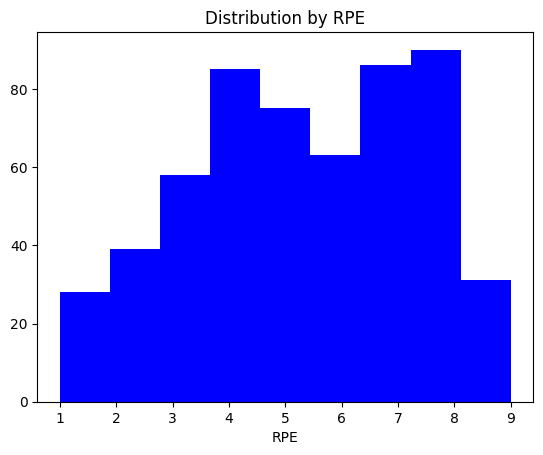

In [241]:
plt.hist(result3['Rpe'],bins=9,color='b')
plt.xlabel('RPE')
plt.title('Distribution by RPE')

In [265]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

y = result3['Rpe']
X = result3[['PowerAverage', 'HeartRateAverage']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

mod_probe = OrderedModel(y_train, X_train, distr='logit')
res_log = mod_probe.fit(method='bfgs')

predicted = res_log.model.predict(res_log.params, np.array(X_test))
preds = [np.argmax(x) for x in predicted]

res_log.summary()

Optimization terminated successfully.
         Current function value: 1.897649
         Iterations: 49
         Function evaluations: 54
         Gradient evaluations: 54


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    Rpe   Log-Likelihood:                -631.92
Model:                   OrderedModel   AIC:                             1284.
Method:            Maximum Likelihood   BIC:                             1322.
Date:                Thu, 15 Feb 2024                                         
Time:                        19:16:02                                         
No. Observations:                 333                                         
Df Residuals:                     323                                         
Df Model:                           2                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
PowerAverage         0.0057      0.004      1.603      0.109      -0.001       0.013
HeartRateAverage     0.0804      0.010      8.231      0.000       0.061       0.100
1/2                  7.6266      1.058      7.210      0.000       5.553       9.700
2/3                  0.1841      0.208      0.887      0.375      -0.223       0.591
3/4                  0.1136      0.152      0.750      0.454      -0.183       0.411
4/5                 -0.0021      0.126     -0.016      0.987      -0.250       0.246
5/6                 -0.3550      0.141     -2.511      0.012      -0.632      -0.078
6/7                 -0.5396      0.158     -3.424      0.001      -0.849      -0.231
7/8                 -0.1643      0.138     -1.194      0.233      -0.434       0.105
8/9                  0.6692      0.125      5.343      0.000       0.424       0.915
====================================================================================
"""

In [266]:
from sklearn import metrics

metrics.accuracy_score(y_test, preds)

0.20270270270270271

In [267]:
from statsmodels.miscmodels.ordinal_model import OrderedModel

y = result3['Rpe']
X = result3[['PowerAverage', 'HeartRateAverage', 'TimeTotalInHours']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

mod_probe = OrderedModel(y_train, X_train, distr='logit')
res_log = mod_probe.fit(method='bfgs')

predicted = res_log.model.predict(res_log.params, np.array(X_test))
preds = [np.argmax(x) for x in predicted]

res_log.summary()

Optimization terminated successfully.
         Current function value: 1.758149
         Iterations: 52
         Function evaluations: 57
         Gradient evaluations: 57


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OrderedModel Results                             
==============================================================================
Dep. Variable:                    Rpe   Log-Likelihood:                -585.46
Model:                   OrderedModel   AIC:                             1193.
Method:            Maximum Likelihood   BIC:                             1235.
Date:                Thu, 15 Feb 2024                                         
Time:                        19:16:22                                         
No. Observations:                 333                                         
Df Residuals:                     322                                         
Df Model:                           3                                         
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
PowerAverage         0.0121      0.004      3.406      0.001       0.005       0.019
HeartRateAverage     0.0804      0.010      8.159      0.000       0.061       0.100
TimeTotalInHours     0.7723      0.089      8.695      0.000       0.598       0.946
1/2                  9.6937      1.112      8.720      0.000       7.515      11.873
2/3                  0.3037      0.201      1.513      0.130      -0.090       0.697
3/4                  0.2585      0.147      1.754      0.079      -0.030       0.547
4/5                  0.1522      0.125      1.218      0.223      -0.093       0.397
5/6                 -0.1903      0.141     -1.353      0.176      -0.466       0.085
6/7                 -0.3715      0.157     -2.366      0.018      -0.679      -0.064
7/8                  0.0148      0.137      0.108      0.914      -0.253       0.283
8/9                  0.8158      0.123      6.648      0.000       0.575       1.056
====================================================================================
"""

In [268]:
from sklearn import metrics

metrics.accuracy_score(y_test, preds)

0.2072072072072072

Because RPE is an ordered categorical variable, I used the ordinal model feature to do a multinomial logistic regression of sorts, where first, just average power and average heart rate were used to predict RPE, and then, with a second model, added the total ride time. 

Though the accuracy metrics of both models are equally poor, the Log-Likelihood of the model with the total ride time is less, indicating some improvement in the model. 